# Climate Data Random Forest Analysis

## Contents
### Random Forest Analysis to find location importance
### Random Forest Analysis to find climate variable importance

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import matplotlib.pyplot as plt

In [2]:
climate = pd.read_csv(r'C:\Users\kacie\Box\Personal\CareerFoundry\Machine Learning\Climate Data\'Cleaned Scaled Climate Data.csv', index_col = None)

In [3]:
pleasant = pd.read_csv(r'C:\Users\kacie\Box\Personal\CareerFoundry\Machine Learning\Climate Data\Scaled pleasant data without Dates.csv')

In [4]:
climate.head()

,Unnamed: 0,BASEL_cloud_cover,BASEL_global_radiation,BASEL_humidity,BASEL_precipitation,BASEL_pressure,BASEL_sunshine,BASEL_temp_max,BASEL_temp_mean,BASEL_temp_min,...,STOCKHOLM_temp_min,VALENTIA_cloud_cover,VALENTIA_global_radiation,VALENTIA_humidity,VALENTIA_precipitation,VALENTIA_pressure,VALENTIA_sunshine,VALENTIA_temp_max,VALENTIA_temp_mean,VALENTIA_temp_min
0,0,0.660514,-1.101066,0.826097,-0.265148,-0.001949,-0.902918,-0.478356,-0.528623,-0.845652,...,-0.290439,-0.443701,-0.806427,0.761754,-0.088407,-1.299744,0.372147,-0.752237,-0.668215,-0.519743
1,1,0.244897,-1.058108,0.735760,1.658760,-0.001949,-0.810126,-0.569988,-0.582946,-0.462450,...,-0.183610,0.783085,-1.042055,1.183580,0.503361,-1.262455,-0.829285,-0.407141,-0.548046,-0.629054
2,2,1.076130,-1.251420,1.277781,0.155707,-0.001949,-1.065304,-0.592896,-0.257010,-0.186545,...,-0.410621,0.783085,-1.136306,1.183580,-0.396127,-0.432779,-1.009500,-0.177078,-0.067372,0.054135
3,3,-1.001953,-0.821838,1.458455,-0.445514,-0.001949,-0.114186,-0.512718,-0.555784,-0.385810,...,-0.530804,0.783085,-1.183432,0.480538,0.669056,0.387574,-1.039536,-0.838511,-0.998679,-0.164486
4,4,0.244897,-0.746661,1.729466,-0.164944,-0.001949,0.187388,-1.039603,-1.003946,-1.075573,...,-0.477389,-1.670486,-0.794645,-0.363113,-0.490810,1.729970,0.672505,-1.471186,-1.509396,-1.339569


In [5]:
climate.drop('Unnamed: 0', axis = 1, inplace = True)
climate.head()

,BASEL_cloud_cover,BASEL_global_radiation,BASEL_humidity,BASEL_precipitation,BASEL_pressure,BASEL_sunshine,BASEL_temp_max,BASEL_temp_mean,BASEL_temp_min,BELGRADE_cloud_cover,...,STOCKHOLM_temp_min,VALENTIA_cloud_cover,VALENTIA_global_radiation,VALENTIA_humidity,VALENTIA_precipitation,VALENTIA_pressure,VALENTIA_sunshine,VALENTIA_temp_max,VALENTIA_temp_mean,VALENTIA_temp_min
0,0.660514,-1.101066,0.826097,-0.265148,-0.001949,-0.902918,-0.478356,-0.528623,-0.845652,-1.206433,...,-0.290439,-0.443701,-0.806427,0.761754,-0.088407,-1.299744,0.372147,-0.752237,-0.668215,-0.519743
1,0.244897,-1.058108,0.735760,1.658760,-0.001949,-0.810126,-0.569988,-0.582946,-0.462450,0.652846,...,-0.183610,0.783085,-1.042055,1.183580,0.503361,-1.262455,-0.829285,-0.407141,-0.548046,-0.629054
2,1.076130,-1.251420,1.277781,0.155707,-0.001949,-1.065304,-0.592896,-0.257010,-0.186545,0.652846,...,-0.410621,0.783085,-1.136306,1.183580,-0.396127,-0.432779,-1.009500,-0.177078,-0.067372,0.054135
3,-1.001953,-0.821838,1.458455,-0.445514,-0.001949,-0.114186,-0.512718,-0.555784,-0.385810,1.396557,...,-0.530804,0.783085,-1.183432,0.480538,0.669056,0.387574,-1.039536,-0.838511,-0.998679,-0.164486
4,0.244897,-0.746661,1.729466,-0.164944,-0.001949,0.187388,-1.039603,-1.003946,-1.075573,1.396557,...,-0.477389,-1.670486,-0.794645,-0.363113,-0.490810,1.729970,0.672505,-1.471186,-1.509396,-1.339569


In [6]:
pleasant.head()

,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [7]:
print(climate.shape)
print(pleasant.shape)

(22950, 135)
(22950, 15)


### Random Forest Analysis to find location importance

In [8]:
# create datasets or analysis
X = climate
y = pleasant

In [51]:
X = np.array(climate).reshape(-1, 15, 9)
y = np.array(pleasant).reshape(-1, 15)
print(X.shape)
print(y.shape)

(22950, 15, 9)
(22950, 15)


In [13]:
from sklearn.model_selection import train_test_split

In [52]:
# split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(18360, 15, 9)
(4590, 15, 9)
(18360, 15)
(4590, 15)


In [53]:
y_train = np.argmax(y_train, axis = 1)
print(y_train.shape)
y_test = np.argmax(y_test, axis = 1)
print(y_test.shape)

(18360,)
(4590,)


In [55]:
X_train=X_train.reshape(-1, 135)
X_test=X_test.reshape(-1, 135)
print(X_train.shape)
print(X_test.shape)

(18360, 135)
(4590, 135)


In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV

In [57]:
# grid search to find the best number of trees to use
n_estimators_options = [110, 150, 200]

# Loop over the parameter grid
for n_estimators in n_estimators_options:
    model = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    train_predictions = model.predict(X_train)
    accuracy_train = accuracy_score(y_train, train_predictions)
    print(f"Tested {n_estimators} trees: Testing Accuracy = {accuracy}")
    print(f"Tested {n_estimators} trees: Training Accuracy = {accuracy_train}")

Tested 110 trees: Testing Accuracy = 0.9315904139433551
Tested 110 trees: Training Accuracy = 1.0
Tested 150 trees: Testing Accuracy = 0.9352941176470588
Tested 150 trees: Training Accuracy = 1.0
Tested 200 trees: Testing Accuracy = 0.9363834422657952
Tested 200 trees: Training Accuracy = 1.0


In [67]:
# grid search to find the best max depth
max_depth_options = [15, 17, 19]

# Loop over the parameter grid
for max_depth in max_depth_options:
    model = RandomForestClassifier(n_estimators=200, max_depth=max_depth, random_state=42)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    train_predictions = model.predict(X_train)
    accuracy_train = accuracy_score(y_train, train_predictions)
    print(f"Tested depth of {max_depth}: Testing Accuracy = {accuracy}")
    print(f"Tested depth of {max_depth}: Training Accuracy = {accuracy_train}")

Tested depth of 15: Testing Accuracy = 0.9394335511982571
Tested depth of 15: Training Accuracy = 1.0
Tested depth of 17: Testing Accuracy = 0.934640522875817
Tested depth of 17: Training Accuracy = 1.0
Tested depth of 19: Testing Accuracy = 0.9372549019607843
Tested depth of 19: Training Accuracy = 1.0


In [63]:
# grid search to find the best min_sample_split
min_samples_split_options = [2, 3, 4]

# Loop over the parameter grid
for min_samples_split in min_samples_split_options:
    model = RandomForestClassifier(n_estimators=120, max_depth=15, min_samples_split=min_samples_split, random_state=42)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    train_predictions = model.predict(X_train)
    accuracy_train = accuracy_score(y_train, train_predictions)
    print(f"Tested {min_samples_split} minimum splits: Testing Accuracy = {accuracy}")
    print(f"Tested {min_samples_split} minimum splits: Training Accuracy = {accuracy_train}")

Tested 2 minimum splits: Testing Accuracy = 0.9355119825708061
Tested 2 minimum splits: Training Accuracy = 1.0
Tested 3 minimum splits: Testing Accuracy = 0.9339869281045752
Tested 3 minimum splits: Training Accuracy = 1.0
Tested 4 minimum splits: Testing Accuracy = 0.9368191721132898
Tested 4 minimum splits: Training Accuracy = 0.9997821350762527


In [64]:
# grid search to find the best min_samples_leaf
min_samples_leaf_options = [1, 2, 3]

# Loop over the parameter grid
for min_samples_leaf in min_samples_leaf_options:
    model = RandomForestClassifier(n_estimators=120, max_depth=15, min_samples_split=2, min_samples_leaf=min_samples_leaf, random_state=42)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    train_predictions = model.predict(X_train)
    accuracy_train = accuracy_score(y_train, train_predictions)
    print(f"Tested {min_samples_leaf} minimum leafs: Testing Accuracy = {accuracy}")
    print(f"Tested {min_samples_leaf} minimum leafs: Training Accuracy = {accuracy_train}")

Tested 1 minimum leafs: Testing Accuracy = 0.933115468409586
Tested 1 minimum leafs: Training Accuracy = 1.0
Tested 2 minimum leafs: Testing Accuracy = 0.9342047930283225
Tested 2 minimum leafs: Training Accuracy = 0.9989651416122004
Tested 3 minimum leafs: Testing Accuracy = 0.9315904139433551
Tested 3 minimum leafs: Training Accuracy = 0.9929193899782135


In [68]:
# grid search to find the best max_features
max_features_options = [22, 24, 26]

# Loop over the parameter grid
for max_features in max_features_options:
    model = RandomForestClassifier(n_estimators=120, max_depth=15, min_samples_split=2, min_samples_leaf=1, max_features=max_features, random_state=42)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    train_predictions = model.predict(X_train)
    accuracy_train = accuracy_score(y_train, train_predictions)
    print(f"Tested {max_features} features: Testing Accuracy = {accuracy}")
    print(f"Tested {max_features} features: Training Accuracy = {accuracy_train}")

Tested 22 features: Testing Accuracy = 0.9612200435729847
Tested 22 features: Training Accuracy = 1.0
Tested 24 features: Testing Accuracy = 0.9636165577342048
Tested 24 features: Training Accuracy = 1.0
Tested 26 features: Testing Accuracy = 0.967755991285403
Tested 26 features: Training Accuracy = 1.0


In [69]:
param_grid = {
    'n_estimators': [200],  
    'max_features': [26, 30],
    'max_depth': [12, 15, 17],
    'min_samples_split': [2],
    'min_samples_leaf': [1],
}


In [15]:
import time

In [70]:
start = time.time()
grid = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3, scoring='accuracy', verbose = 3, n_jobs=-2) #cv = 5
model_grid=grid.fit(X_train, y_train)
print("Best parameters:", grid.best_params_)
print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print('Search took %s minutes' % ((time.time() - start)/60))

Fitting 3 folds for each of 6 candidates, totalling 18 fits
Best parameters: {'max_depth': 17, 'max_features': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best cross-validation score: 0.96
Search took 5.236944444974264 minutes


In [71]:
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred))


Test Accuracy: 0.9684095860566448


In [74]:
y_pred.shape

(4590,)

In [79]:
np.unique(y_pred)

array([0, 1, 2, 3, 4, 5, 7, 9], dtype=int64)

In [76]:
y_pred_prob = (y_pred > 0.5).astype(int)
y_pred_prob.shape

(4590,)

In [78]:
np.unique(y_pred_prob)

array([0, 1])

In [16]:
from sklearn.tree import plot_tree

In [42]:
pleasantness = ['Unpleasant', 'Pleasant']

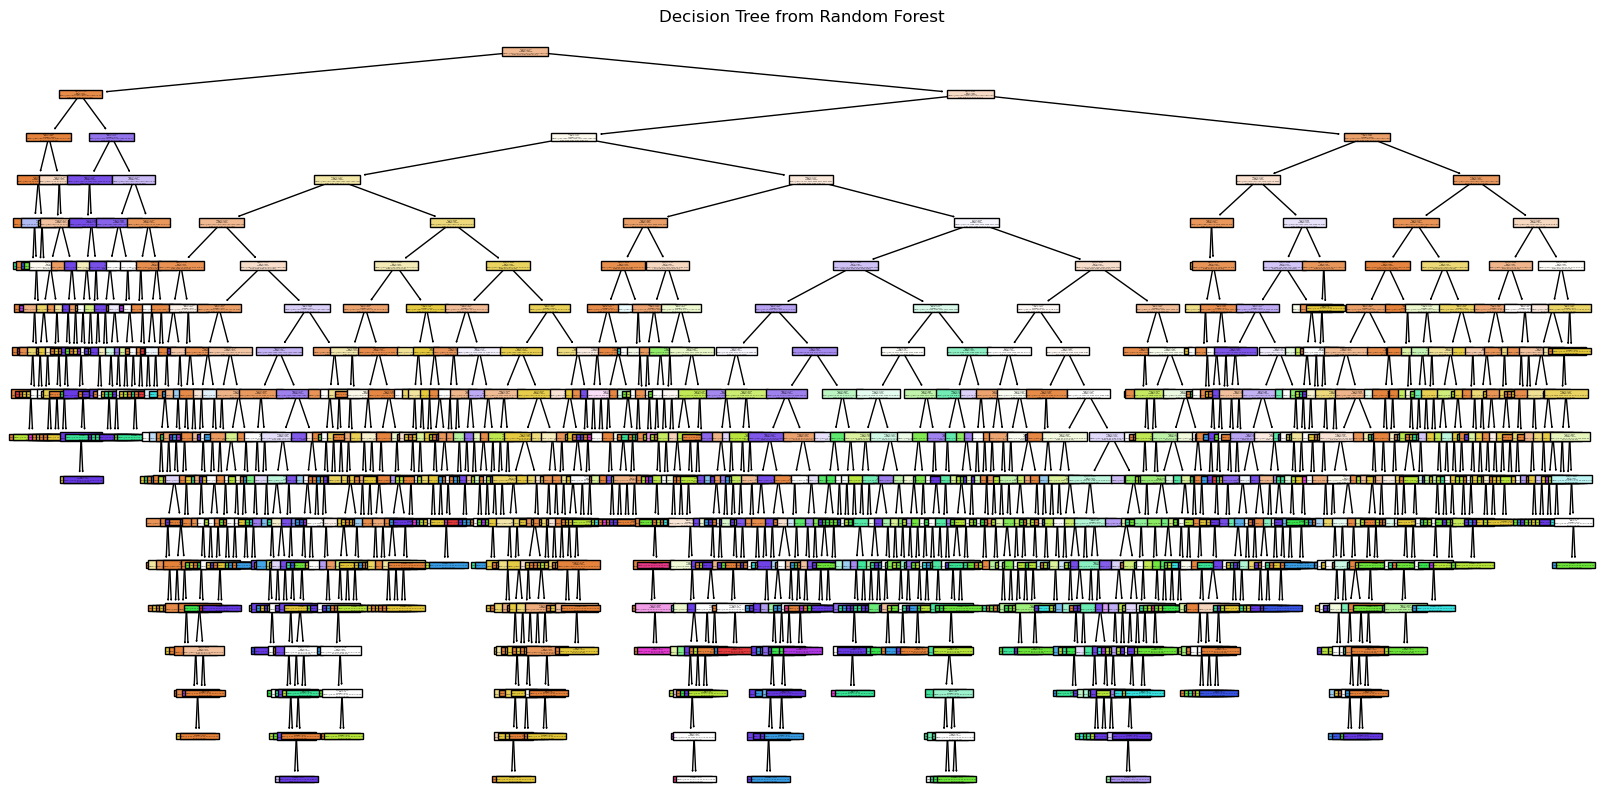

In [82]:
# plot tree 5
tree5 = best_model.estimators_[5]

plt.figure(figsize=(20,10))  
plot_tree(tree5, filled=True, proportion=True)
plt.title('Decision Tree from Random Forest')
plt.show()

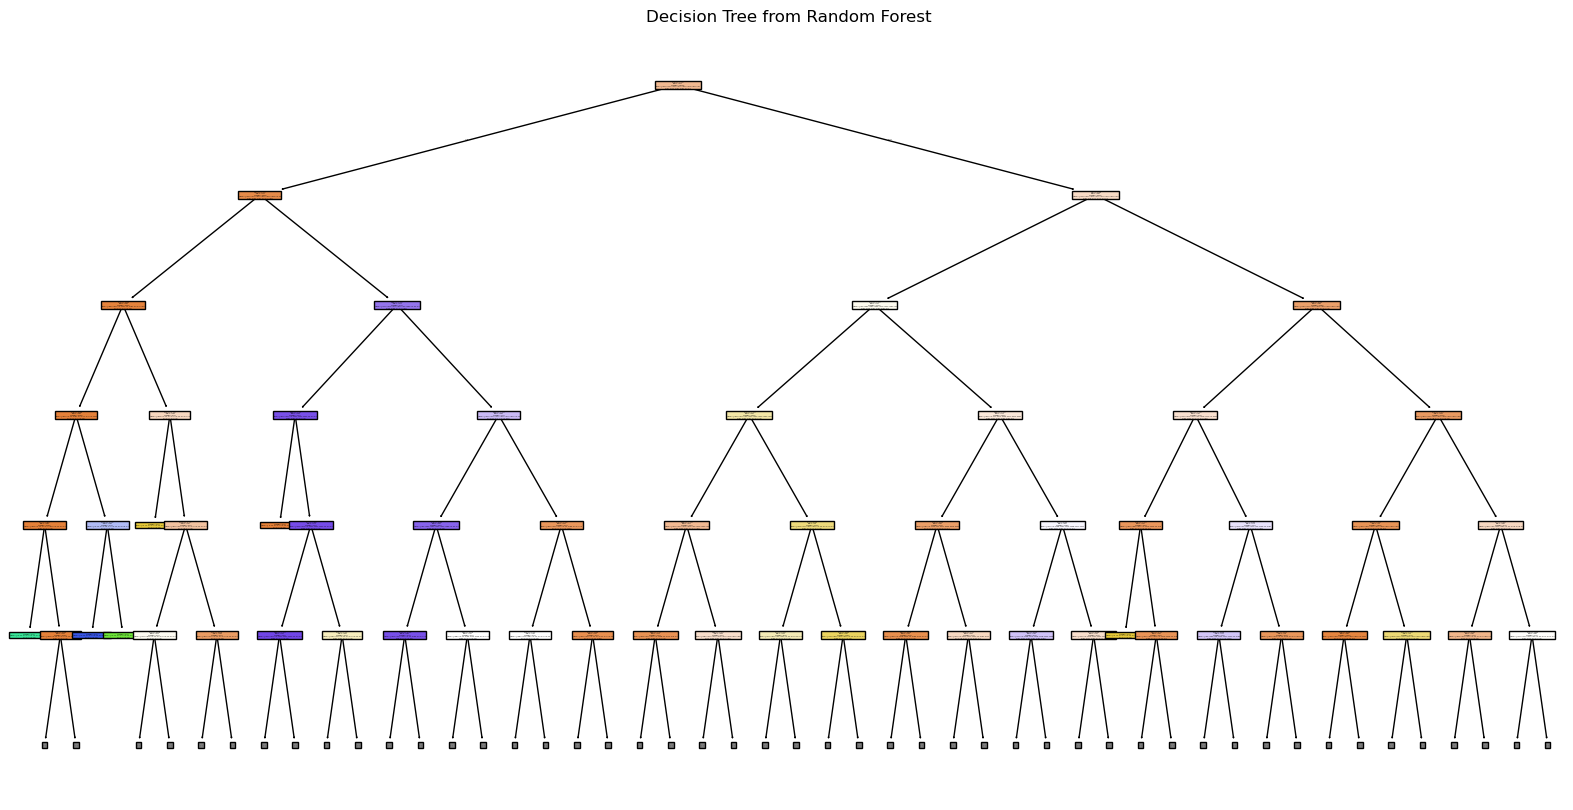

In [83]:
# plot tree 5, limited to a depth of 5

tree5 = best_model.estimators_[5]

plt.figure(figsize=(20,10))  
plot_tree(tree5, filled=True, proportion=True, max_depth = 5)
plt.title('Decision Tree from Random Forest')
plt.show()

In [84]:
# find feature importance for each location
feature_importances = best_model.feature_importances_
feature_importances.shape

(135,)

In [85]:
feature_importances = feature_importances.reshape(-1,15,9)
feature_importances.shape

(1, 15, 9)

In [86]:
# sum the feature importance for each location to determine individual location importance
location_importances = np.sum(feature_importances[0], axis=1)
location_importances

array([0.2700923 , 0.22513889, 0.07983868, 0.02708548, 0.02465258,
       0.03027889, 0.01496029, 0.06168455, 0.02753809, 0.14594581,
       0.03406861, 0.01525981, 0.01703742, 0.01379444, 0.01262417])

In [87]:
# convert location importance array to series with location index
locations = ['BASEL', 'BELGRADE', 'BUDAPEST', 'DEBILT', 'DUSSELDORF', 'HEATHROW', 'KASSEL', 'LJUBLJANA', 'MAASTRICHT', 'MADRID', 'MUNCHENB', 'OSLO', 'SONNBLICK', 'STOCKHOLM', 'VALENTIA']
locations = pd.Series(location_importances, index = locations) 
locations

BASEL         0.270092
BELGRADE      0.225139
BUDAPEST      0.079839
DEBILT        0.027085
DUSSELDORF    0.024653
HEATHROW      0.030279
KASSEL        0.014960
LJUBLJANA     0.061685
MAASTRICHT    0.027538
MADRID        0.145946
MUNCHENB      0.034069
OSLO          0.015260
SONNBLICK     0.017037
STOCKHOLM     0.013794
VALENTIA      0.012624
dtype: float64

Text(0.5, 1.0, 'Importance by Location')

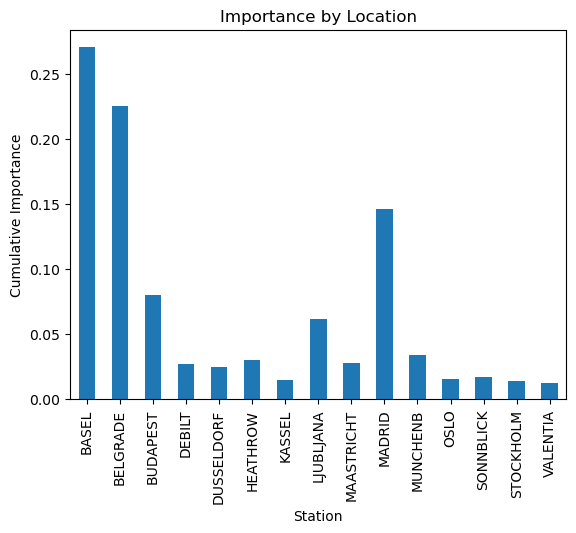

In [88]:
# plot location importance
locations.plot(kind = 'bar')
plt.xticks(rotation = 90)
plt.xlabel('Station')
plt.ylabel('Cumulative Importance')
plt.title('Importance by Location')

### Random Forest Analysis to find variable importance

In [9]:
# create df for climate data from the 3 cities contributing most to the RF
TopCities = ['BASEL', 'BELGRADE', 'MADRID']
Top3 = climate[[col for col in climate.columns if any(city in col for city in TopCities)]]
Top3.shape

(22950, 27)

In [10]:
# create df for pleasantness data from the 3 cities contributing most to the RF
Top3_Pleasant = pleasant[[col for col in pleasant.columns if any(city in col for city in TopCities)]]
Top3_Pleasant.head()

,BASEL_pleasant_weather,BELGRADE_pleasant_weather,MADRID_pleasant_weather
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0


In [11]:
# create df for analysis
X = Top3
y = Top3_Pleasant

In [17]:
# split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(18360, 27)
(4590, 27)
(18360, 3)
(4590, 3)


In [96]:
# grid search to find the best number of trees to use
n_estimators_options = [9, 11, 13]

# Loop over the parameter grid
for n_estimators in n_estimators_options:
    model = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    train_predictions = model.predict(X_train)
    accuracy_train = accuracy_score(y_train, train_predictions)
    print(f"Tested {n_estimators} trees: Testing Accuracy = {accuracy}")
    print(f"Tested {n_estimators} trees: Training Accuracy = {accuracy_train}")

Tested 9 trees: Testing Accuracy = 0.9893246187363834
Tested 9 trees: Training Accuracy = 0.9996187363834422
Tested 11 trees: Testing Accuracy = 0.9912854030501089
Tested 11 trees: Training Accuracy = 0.9998366013071895
Tested 13 trees: Testing Accuracy = 0.9915032679738562
Tested 13 trees: Training Accuracy = 0.9998366013071895


In [99]:
# grid search to find the best max depth
max_depth_options = [9, 10, 11]

# Loop over the parameter grid
for max_depth in max_depth_options:
    model = RandomForestClassifier(n_estimators=13, max_depth=max_depth, random_state=42)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    train_predictions = model.predict(X_train)
    accuracy_train = accuracy_score(y_train, train_predictions)
    print(f"Tested depth of {max_depth}: Testing Accuracy = {accuracy}")
    print(f"Tested depth of {max_depth}: Training Accuracy = {accuracy_train}")

Tested depth of 9: Testing Accuracy = 0.9915032679738562
Tested depth of 9: Training Accuracy = 0.9959694989106754
Tested depth of 10: Testing Accuracy = 0.9917211328976034
Tested depth of 10: Training Accuracy = 0.9972766884531591
Tested depth of 11: Testing Accuracy = 0.9915032679738562
Tested depth of 11: Training Accuracy = 0.9984204793028323


In [100]:
# grid search to find the best min_sample_split
min_samples_split_options = [2, 3, 4]

# Loop over the parameter grid
for min_samples_split in min_samples_split_options:
    model = RandomForestClassifier(n_estimators=13, max_depth=10, min_samples_split=min_samples_split, random_state=42)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    train_predictions = model.predict(X_train)
    accuracy_train = accuracy_score(y_train, train_predictions)
    print(f"Tested {min_samples_split} minimum splits: Testing Accuracy = {accuracy}")
    print(f"Tested {min_samples_split} minimum splits: Training Accuracy = {accuracy_train}")

Tested 2 minimum splits: Testing Accuracy = 0.9917211328976034
Tested 2 minimum splits: Training Accuracy = 0.9972766884531591
Tested 3 minimum splits: Testing Accuracy = 0.9901960784313726
Tested 3 minimum splits: Training Accuracy = 0.9974945533769063
Tested 4 minimum splits: Testing Accuracy = 0.9893246187363834
Tested 4 minimum splits: Training Accuracy = 0.9955882352941177


In [101]:
# grid search to find the best min_samples_leaf
min_samples_leaf_options = [1, 2, 3]

# Loop over the parameter grid
for min_samples_leaf in min_samples_leaf_options:
    model = RandomForestClassifier(n_estimators=13, max_depth=10, min_samples_split=2, min_samples_leaf=min_samples_leaf, random_state=42)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    train_predictions = model.predict(X_train)
    accuracy_train = accuracy_score(y_train, train_predictions)
    print(f"Tested {min_samples_leaf} minimum leafs: Testing Accuracy = {accuracy}")
    print(f"Tested {min_samples_leaf} minimum leafs: Training Accuracy = {accuracy_train}")

Tested 1 minimum leafs: Testing Accuracy = 0.9917211328976034
Tested 1 minimum leafs: Training Accuracy = 0.9972766884531591
Tested 2 minimum leafs: Testing Accuracy = 0.9899782135076253
Tested 2 minimum leafs: Training Accuracy = 0.9963507625272331
Tested 3 minimum leafs: Testing Accuracy = 0.9901960784313726
Tested 3 minimum leafs: Training Accuracy = 0.9961873638344226


In [102]:
# grid search to find the best max_features
max_features_options = [10, 12, 14]

# Loop over the parameter grid
for max_features in max_features_options:
    model = RandomForestClassifier(n_estimators=13, max_depth=10, min_samples_split=2, min_samples_leaf=1, max_features=max_features, random_state=42)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    train_predictions = model.predict(X_train)
    accuracy_train = accuracy_score(y_train, train_predictions)
    print(f"Tested {max_features} features: Testing Accuracy = {accuracy}")
    print(f"Tested {max_features} features: Training Accuracy = {accuracy_train}")

Tested 10 features: Testing Accuracy = 0.9973856209150327
Tested 10 features: Training Accuracy = 0.9998366013071895
Tested 12 features: Testing Accuracy = 0.9982570806100218
Tested 12 features: Training Accuracy = 1.0
Tested 14 features: Testing Accuracy = 0.998474945533769
Tested 14 features: Training Accuracy = 1.0


In [18]:
param_grid = {
    'n_estimators': [9, 11, 13],  
    'max_features': [9, 10, 11],
    'max_depth': [10, 11],
    'min_samples_split': [2],
    'min_samples_leaf': [1],
}


In [19]:
start = time.time()
grid = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3, scoring='accuracy', verbose = 3, n_jobs=-2) #cv = 5
model_grid=grid.fit(X_train, y_train)
print("Best parameters:", grid.best_params_)
print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print('Search took %s minutes' % ((time.time() - start)/60))

Fitting 3 folds for each of 18 candidates, totalling 54 fits
Best parameters: {'max_depth': 11, 'max_features': 11, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 11}
Best cross-validation score: 1.00
Search took 0.2621610681215922 minutes


In [20]:
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred))


Test Accuracy: 0.9986928104575163


In [104]:
best_model.fit(X_train, y_train)
predictions = best_model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy = {accuracy}")

Accuracy = 0.9982570806100218


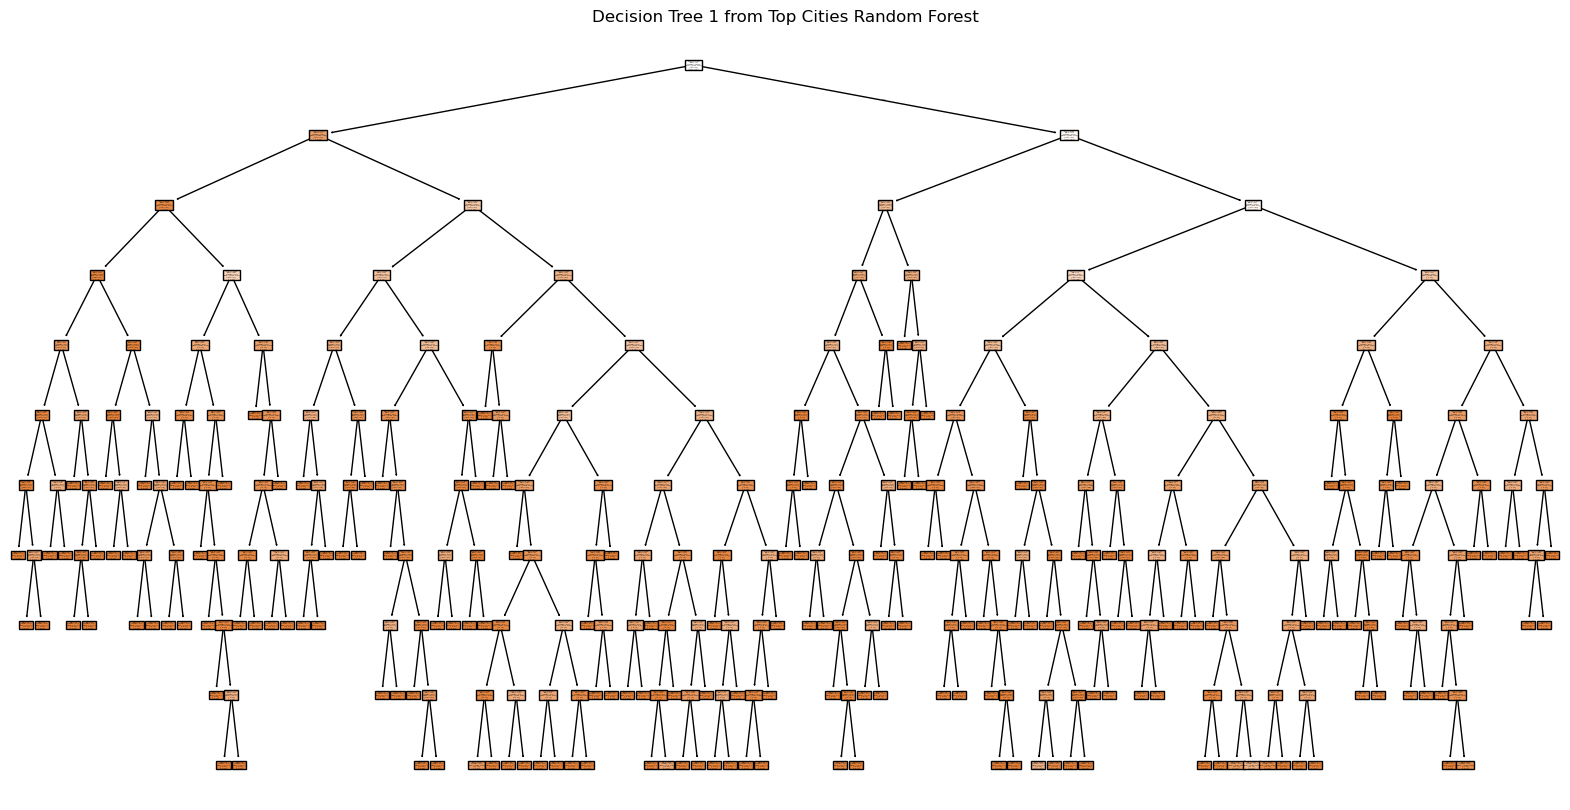

In [105]:
# plot tree 1
plt.figure(figsize=(20,10))  
plot_tree(best_model.estimators_[1], filled=True, class_names = ['Unpleasant', 'Pleasant'], proportion=True)
plt.title('Decision Tree 1 from Top Cities Random Forest')
plt.show()


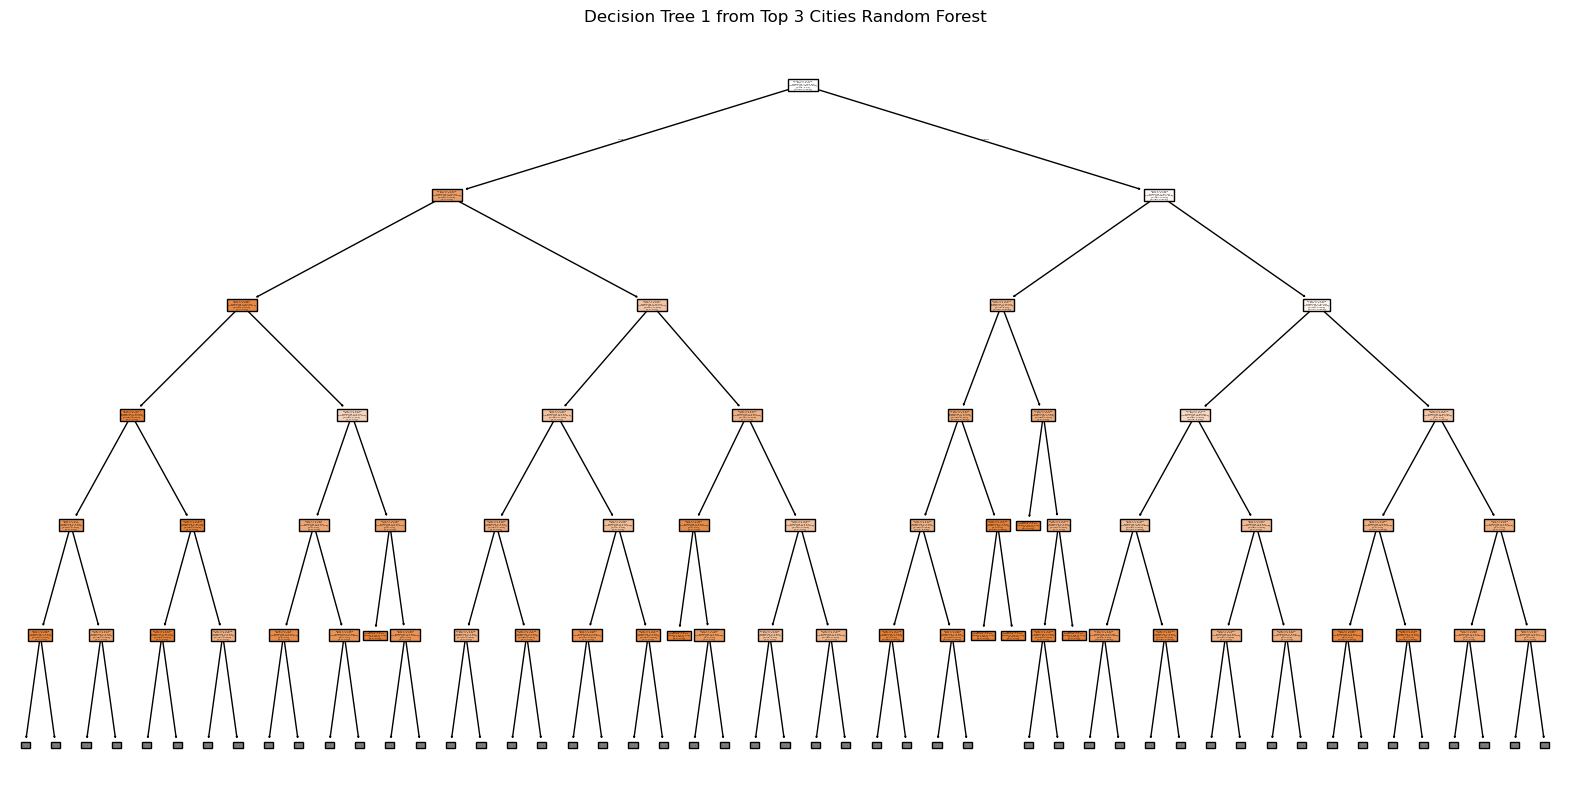

In [107]:
# plot tree 1, limited to depth of 5
plt.figure(figsize=(20,10))  
plot_tree(best_model.estimators_[1], filled=True, class_names = ['Unpleasant', 'Pleasant'], proportion=True, max_depth=5)
plt.title('Decision Tree 1 from Top 3 Cities Random Forest')
plt.show()

In [109]:
# create array of feature importance
feature_importances = best_model.feature_importances_
feature_importances

array([0.00387463, 0.00284923, 0.00063748, 0.12518736, 0.00036634,
       0.01065378, 0.1582955 , 0.02996837, 0.00051683, 0.00930669,
       0.0024047 , 0.00084863, 0.1417406 , 0.00134062, 0.01080593,
       0.06505698, 0.01692844, 0.00728613, 0.00291307, 0.00111807,
       0.00287684, 0.0918954 , 0.00056885, 0.01361108, 0.23506898,
       0.0634171 , 0.00046237])

In [110]:
# reshape the array
features = feature_importances.reshape(-1, 3, 9)
features

array([[[0.00387463, 0.00284923, 0.00063748, 0.12518736, 0.00036634,
         0.01065378, 0.1582955 , 0.02996837, 0.00051683],
        [0.00930669, 0.0024047 , 0.00084863, 0.1417406 , 0.00134062,
         0.01080593, 0.06505698, 0.01692844, 0.00728613],
        [0.00291307, 0.00111807, 0.00287684, 0.0918954 , 0.00056885,
         0.01361108, 0.23506898, 0.0634171 , 0.00046237]]])

In [111]:
# create array for plotting
# sum the fatures for each location
top3features = np.sum(features, axis = 1)
# colapse the array
top3features = top3features.ravel()
top3features

array([0.0160944 , 0.006372  , 0.00436295, 0.35882337, 0.00227581,
       0.03507078, 0.45842146, 0.11031391, 0.00826532])

In [114]:
variables = ['cloud_cover', 'global_radiation', 'humidity', 'precipitation', 'pressure', 'sunshine', 'temp_max', 'temp_mean', 'temp_min']

In [115]:
# create a series for plotting
top3features = pd.Series(top3features, index = variables) 
top3features

cloud_cover         0.016094
global_radiation    0.006372
humidity            0.004363
precipitation       0.358823
pressure            0.002276
sunshine            0.035071
temp_max            0.458421
temp_mean           0.110314
temp_min            0.008265
dtype: float64

Text(0.5, 1.0, 'Importance by Variable for Top 3 Cities')

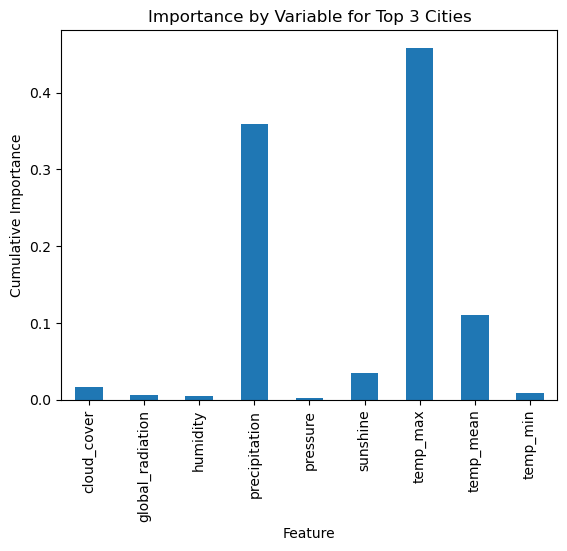

In [117]:
# plot the feature importance for the 3 cities contributing the most to the RF
top3features.plot(kind = 'bar')
plt.xticks(rotation = 90)
plt.xlabel('Feature')
plt.ylabel('Cumulative Importance')
plt.title('Importance by Variable for Top 3 Cities')